In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage.filters import gaussian
from PerspectiveTranform import *
from cameraCalibration import *
from draw_lanes import *
from Thresholding import *

%matplotlib inline

In [2]:
def show_image(image,title="image",cmap_type="gray"):
    plt.imshow(image,cmap_type)
    plt.title(title)
#     plt.axis("off")

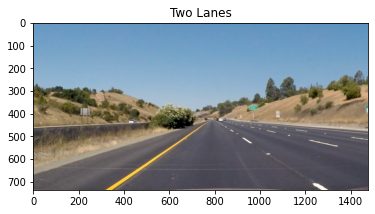

In [3]:
lane_image = cv2.imread("C:/Users/mohamed/Desktop/SENIOR YEAR PROJECTS/Image processing/Lane-Detection/lanes2.png")
lane_image = cv2.cvtColor(lane_image,cv2.COLOR_BGR2RGB)
show_image(lane_image,"Two Lanes")

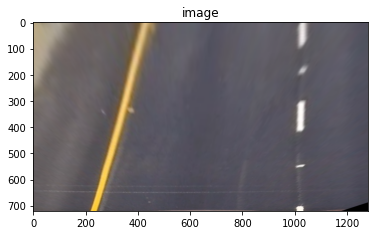

In [4]:
lane_image = cv2.resize(lane_image,(1280,720))
perspective = PerspectiveTranform()
top_view = perspective.BirdView(lane_image)
show_image(top_view)


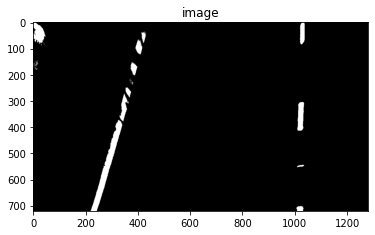

In [5]:
threshold = Thresholding()
binarized_image = threshold.forward(top_view)
show_image(binarized_image)

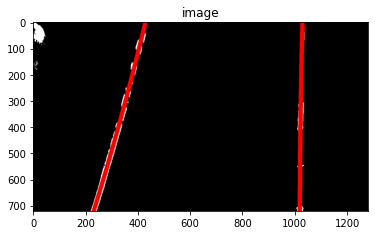

In [6]:
lanes = DrawLanes()
out_image,left_line,right_line,img,topleft_windows,bottomright_windows = lanes.forward(binarized_image)
img = np.dstack((img, img, img))
cv2.polylines(img,[left_line],False,(255,0,0),15)
cv2.polylines(img,[right_line],False,(255,0,0),15)
show_image(img)

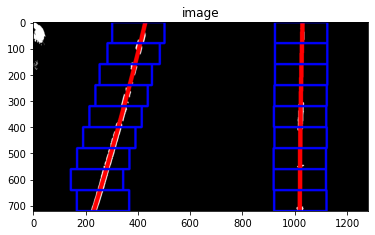

In [7]:
for i in range(18):
    cv2.rectangle(img,topleft_windows[i],bottomright_windows[i],(0,0,255),8)
show_image(img)

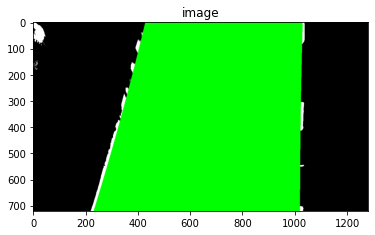

In [8]:
show_image(out_image)